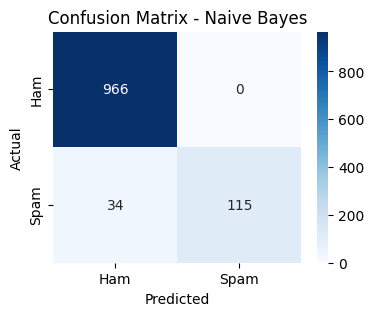

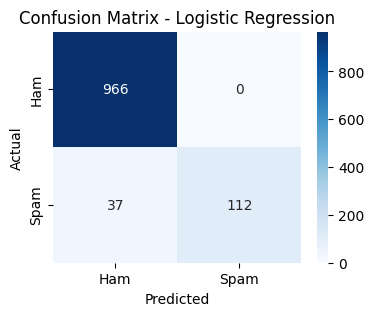

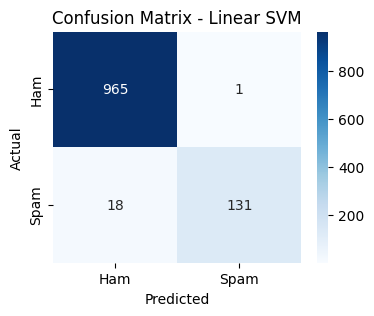

                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.969507   1.000000  0.771812  0.871212
1  Logistic Regression  0.966816   1.000000  0.751678  0.858238
2           Linear SVM  0.982960   0.992424  0.879195  0.932384


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# -------------------------
# Load and preprocess dataset
# -------------------------
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode labels: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Vectorize text with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# -------------------------
# Define models
# -------------------------
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

# -------------------------
# Train, predict, evaluate
# -------------------------
results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -------------------------
# Results table
# -------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)


In [2]:
import joblib

# After training best model
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']